# Problem Definition
# Rainfall Prediction - Weather Forecasting
Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
## Problem Statement: 
##  1. Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

##  2. Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

##  1. Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

This is a classification Problem

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

the data set has lot of missing values

In [6]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [7]:
df['Date'].nunique()

3004

date is irrelevent attribute in he prediction of rainfall, so it can be dropped from the data

In [8]:
df['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [9]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [10]:
df['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

In [11]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [12]:
df['WindDir9am']=df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])

In [13]:
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [14]:
df['WindDir3pm']=df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [15]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])

In [17]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [18]:
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [19]:
df['Temp3pm'].nunique()

328

In [20]:
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].median())

In [21]:
df['Temp9am'].nunique()

304

In [22]:
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].median())

In [23]:
df['Cloud3pm'].unique()

array([nan,  2.,  8.,  7.,  1.,  5.,  4.,  6.,  3.,  0.])

In [24]:
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mode()[0])

In [25]:
df['Cloud9am'].unique()

array([ 8., nan,  7.,  1.,  0.,  5.,  4.,  2.,  6.,  3.])

In [26]:
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mode()[0])

In [27]:
df['Pressure3pm'].nunique()

374

In [28]:
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].median())

In [29]:
df['Pressure9am'].nunique()

384

In [30]:
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].median())

In [31]:
df['Humidity3pm'].nunique()

94

In [32]:
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].median())

In [33]:
df['Humidity9am'].nunique()

90

In [34]:
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].median())

In [35]:
df['WindSpeed3pm'].nunique()

35

In [36]:
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())

In [37]:
df['WindSpeed9am'].nunique()

34

In [38]:
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())

In [39]:
df['WindGustSpeed'].nunique()

52

In [40]:
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())

In [41]:
df['Sunshine'].nunique()

140

In [42]:
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].median())

In [43]:
df['Evaporation'].nunique()

116

In [44]:
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].median())

In [45]:
df['Rainfall'].nunique()

250

In [46]:
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].median())

In [47]:
df['MaxTemp'].nunique()

331

In [48]:
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].median())

In [49]:
df['MinTemp'].nunique()

285

In [50]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].median())

In [51]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [53]:
d1=le.fit_transform(df['Location'])
d2=le.fit_transform(df['WindGustDir'])
d3=le.fit_transform(df['WindDir9am'])
d4=le.fit_transform(df['WindDir3pm'])
d5=le.fit_transform(df['RainToday'])
d6=le.fit_transform(df['RainTomorrow'])

In [54]:
df['Location']=d1
df['WindGustDir']=d2
df['WindDir9am']=d3
df['WindDir3pm']=d4
df['RainToday']=d5
df['RainTomorrow']=d6

In [55]:
df01=df.drop(columns='Date')

In [56]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   int32  
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   int32  
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   int32  
 9   WindDir3pm     8425 non-null   int32  
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

In [57]:
df01.describe()

Location      MinTemp      MaxTemp     Rainfall  Evaporation  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean      5.793591    13.194255    23.855988     2.725982     5.060332   
std       3.162654     5.379497     6.114697    10.319872     3.871619   
min       0.000000    -2.000000     8.200000     0.000000     0.000000   
25%       3.000000     9.300000    19.300000     0.000000     4.000000   
50%       6.000000    13.300000    23.300000     0.000000     4.600000   
75%       8.000000    17.300000    28.000000     0.800000     5.200000   
max      11.000000    28.500000    45.500000   371.000000   145.000000   

          Sunshine  WindGustDir  WindGustSpeed   WindDir9am   WindDir3pm  ...  \
count  8425.000000  8425.000000    8425.000000  8425.000000  8425.000000  ...   
mean      8.138409     7.217804      40.036320     7.267418     7.810445  ...   
std       2.875324     4.702616      13.781296     4.588045     4.430162  ...   
min       0.000000     0.000000       7.000000     0.000000     0.000000  ...   
25%       8.400000     3.000000      31.000000     3.000000     4.000000  ...   
50%       8.700000     7.000000      39.000000     7.000000     8.000000  ...   
75%       8.900000    12.000000      48.000000    12.000000    11.000000  ...   
max      13.900000    15.000000     107.000000    15.000000    15.000000  ...   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean     67.823739    51.246766  1017.649519  1015.246030     5.265875   
std      16.774237    18.311914     6.275796     6.217494     2.667166   
min      10.000000     6.000000   989.800000   982.900000     0.000000   
25%      56.000000    39.000000  1014.000000  1011.400000     3.000000   
50%      68.000000    51.000000  1017.700000  1015.300000     7.000000   
75%      80.000000    63.000000  1021.300000  1018.800000     7.000000   
max     100.000000    99.000000  1039.000000  1036.000000     8.000000   

          Cloud3pm      Temp9am      Temp3pm    RainToday  RainTomorrow  
count  8425.000000  8425.000000  8425.000000  8425.000000   8425.000000  
mean      5.230742    17.762267    22.436748     0.236202      0.236320  
std       2.564122     5.608301     5.946128     0.424773      0.424846  
min       0.000000     1.900000     7.300000     0.000000      0.000000  
25%       3.000000    13.800000    18.100000     0.000000      0.000000  
50%       7.000000    17.800000    21.900000     0.000000      0.000000  
75%       7.000000    21.900000    26.300000     0.000000      0.000000  
max       8.000000    39.400000    44.100000     1.000000      1.000000  

[8 rows x 22 columns]

In [58]:
df01.corr()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000  0.116555  0.064220  0.005801     0.130778  0.086343   
MinTemp        0.116555  1.000000  0.717522  0.085765     0.262887  0.031722   
MaxTemp        0.064220  0.717522  1.000000 -0.087595     0.326713  0.357559   
Rainfall       0.005801  0.085765 -0.087595  1.000000     0.020252 -0.166957   
Evaporation    0.130778  0.262887  0.326713  0.020252     1.000000  0.217816   
Sunshine       0.086343  0.031722  0.357559 -0.166957     0.217816  1.000000   
WindGustDir   -0.035408 -0.145446 -0.224078  0.037106    -0.073549 -0.105898   
WindGustSpeed  0.230018  0.230200  0.139909  0.082628     0.147367 -0.034623   
WindDir9am    -0.027103 -0.041781 -0.213776  0.093072    -0.055144 -0.082621   
WindDir3pm    -0.027736 -0.147147 -0.180689  0.038153    -0.048325 -0.062308   
WindSpeed9am   0.221035  0.136643  0.013444  0.048726     0.133320 -0.068995   
WindSpeed3pm   0.231897  0.178137  0.088300  0.021594     0.121595 -0.004683   
Humidity9am    0.005680 -0.130711 -0.391081  0.227587    -0.235151 -0.316515   
Humidity3pm    0.055767  0.079143 -0.421952  0.234955    -0.169831 -0.421006   
Pressure9am   -0.031990 -0.429683 -0.325758 -0.069595    -0.177701  0.025163   
Pressure3pm   -0.020292 -0.423261 -0.403283 -0.031261    -0.189711 -0.032167   
Cloud9am       0.033864  0.017318 -0.242249  0.133553    -0.083928 -0.431272   
Cloud3pm       0.008465 -0.038368 -0.242281  0.101161    -0.115199 -0.445870   
Temp9am        0.118062  0.887111  0.866085 -0.007356     0.316489  0.219706   
Temp3pm        0.060441  0.685859  0.974690 -0.090649     0.318211  0.376915   
RainToday      0.003071  0.064752 -0.224693  0.464941    -0.090225 -0.228963   
RainTomorrow   0.002824  0.092965 -0.152672  0.219015    -0.060025 -0.321410   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Location         -0.035408       0.230018   -0.027103   -0.027736  ...   
MinTemp          -0.145446       0.230200   -0.041781   -0.147147  ...   
MaxTemp          -0.224078       0.139909   -0.213776   -0.180689  ...   
Rainfall          0.037106       0.082628    0.093072    0.038153  ...   
Evaporation      -0.073549       0.147367   -0.055144   -0.048325  ...   
Sunshine         -0.105898      -0.034623   -0.082621   -0.062308  ...   
WindGustDir       1.000000       0.025577    0.403562    0.505799  ...   
WindGustSpeed     0.025577       1.000000   -0.068545    0.070677  ...   
WindDir9am        0.403562      -0.068545    1.000000    0.249527  ...   
WindDir3pm        0.505799       0.070677    0.249527    1.000000  ...   
WindSpeed9am      0.025910       0.606090    0.054972    0.025956  ...   
WindSpeed3pm      0.094114       0.639042    0.046787    0.068961  ...   
Humidity9am       0.036413      -0.271865    0.025540   -0.010303  ...   
Humidity3pm       0.053712      -0.093637    0.124647   -0.012211  ...   
Pressure9am      -0.110491      -0.407139   -0.011488   -0.136493  ...   
Pressure3pm      -0.025847      -0.372553    0.072945   -0.043655  ...   
Cloud9am          0.164227      -0.004122    0.098501    0.087079  ...   
Cloud3pm          0.127633       0.031616    0.066539    0.062069  ...   
Temp9am          -0.176350       0.202275   -0.103150   -0.165066  ...   
Temp3pm          -0.237932       0.102066   -0.221064   -0.194762  ...   
RainToday         0.125188       0.076890    0.157324    0.100125  ...   
RainTomorrow      0.051832       0.190274    0.032860    0.008918  ...   

               Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
Location          0.005680     0.055767    -0.031990    -0.020292  0.033864   
MinTemp          -0.130711     0.079143    -0.429683    -0.423261  0.017318   
MaxTemp          -0.391081    -0.421952    -0.325758    -0.403283 -0.242249   
Rainfall          0.227587     0.234955    -0.069595    -0.031261  0.133553   
Evaporation      -0.235151    -0.169831    -0.177701    -0.189711 -0.083928 

<AxesSubplot:>

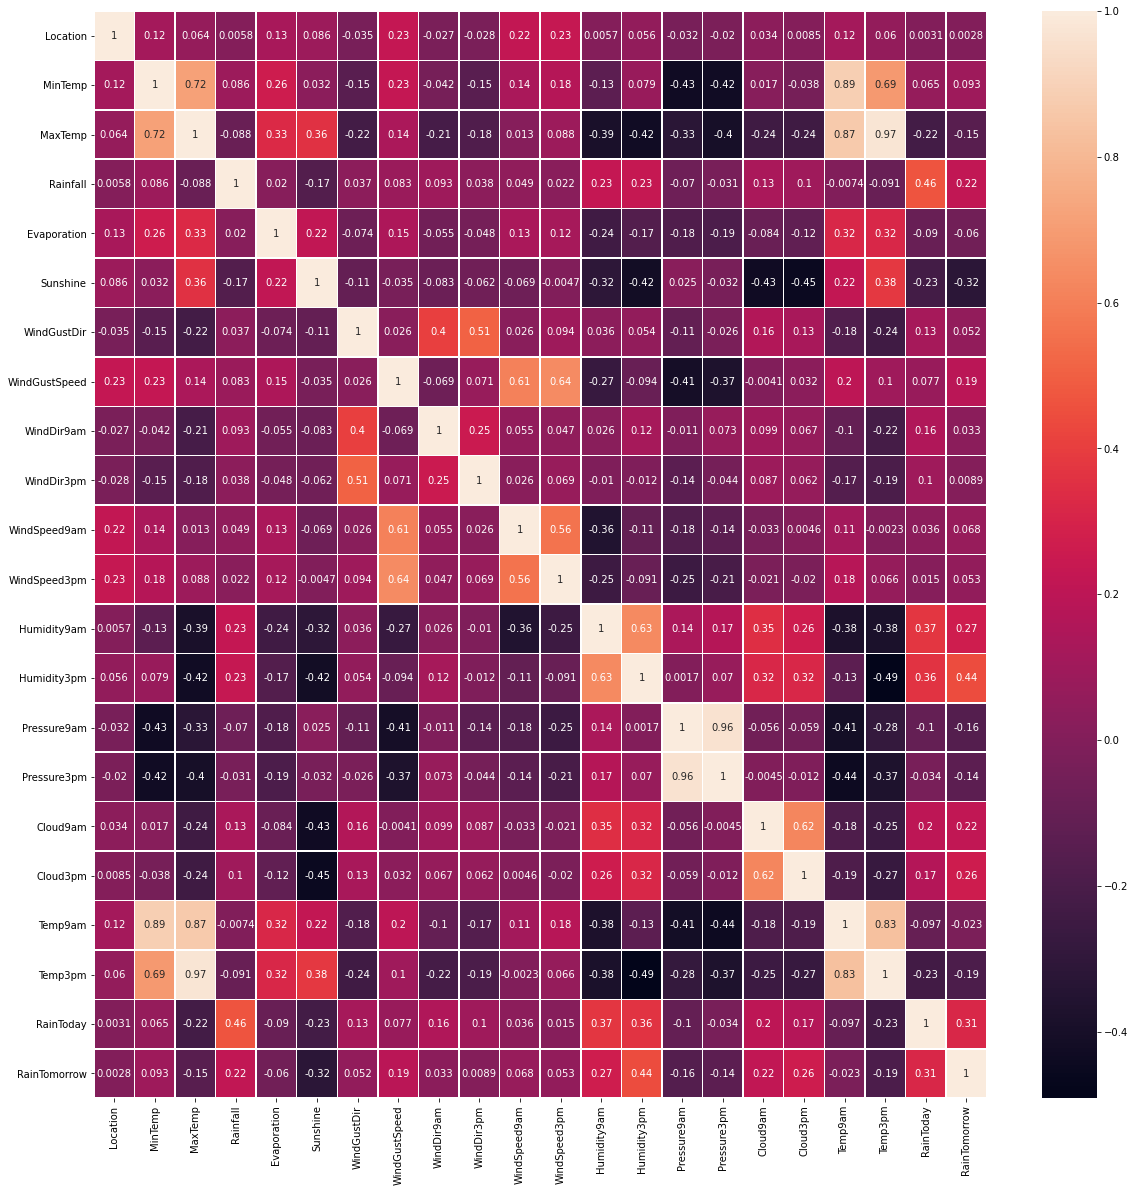

In [59]:
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df01.corr(),annot=True, linewidth=0.5,)

1. Temp3pm and Min Temp correlated, Maxtemp and Temp9am correlated,Temp9 pm and Temp 3pm correlated

2. pressure9am, pressure3pm correlated




In [60]:
d1=df01.drop(columns='Temp3pm')
d2=d1.drop(columns='Temp9am')
d3=d2.drop(columns='MaxTemp')
df1=d3.drop(columns='Pressure3pm')

In [61]:
df01.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [96]:
df1.skew()

Location        -0.044642
MinTemp         -0.075725
Rainfall         3.525839
Evaporation      1.299523
Sunshine        -1.210593
WindGustDir      0.106858
WindGustSpeed    0.698764
WindDir9am       0.165999
WindDir3pm      -0.128607
WindSpeed9am     0.708123
WindSpeed3pm     0.296930
Humidity9am     -0.265598
Humidity3pm      0.108405
Pressure9am      0.022593
Cloud9am        -0.850377
Cloud3pm        -0.787013
RainToday        1.305386
RainTomorrow     1.294461
dtype: float64

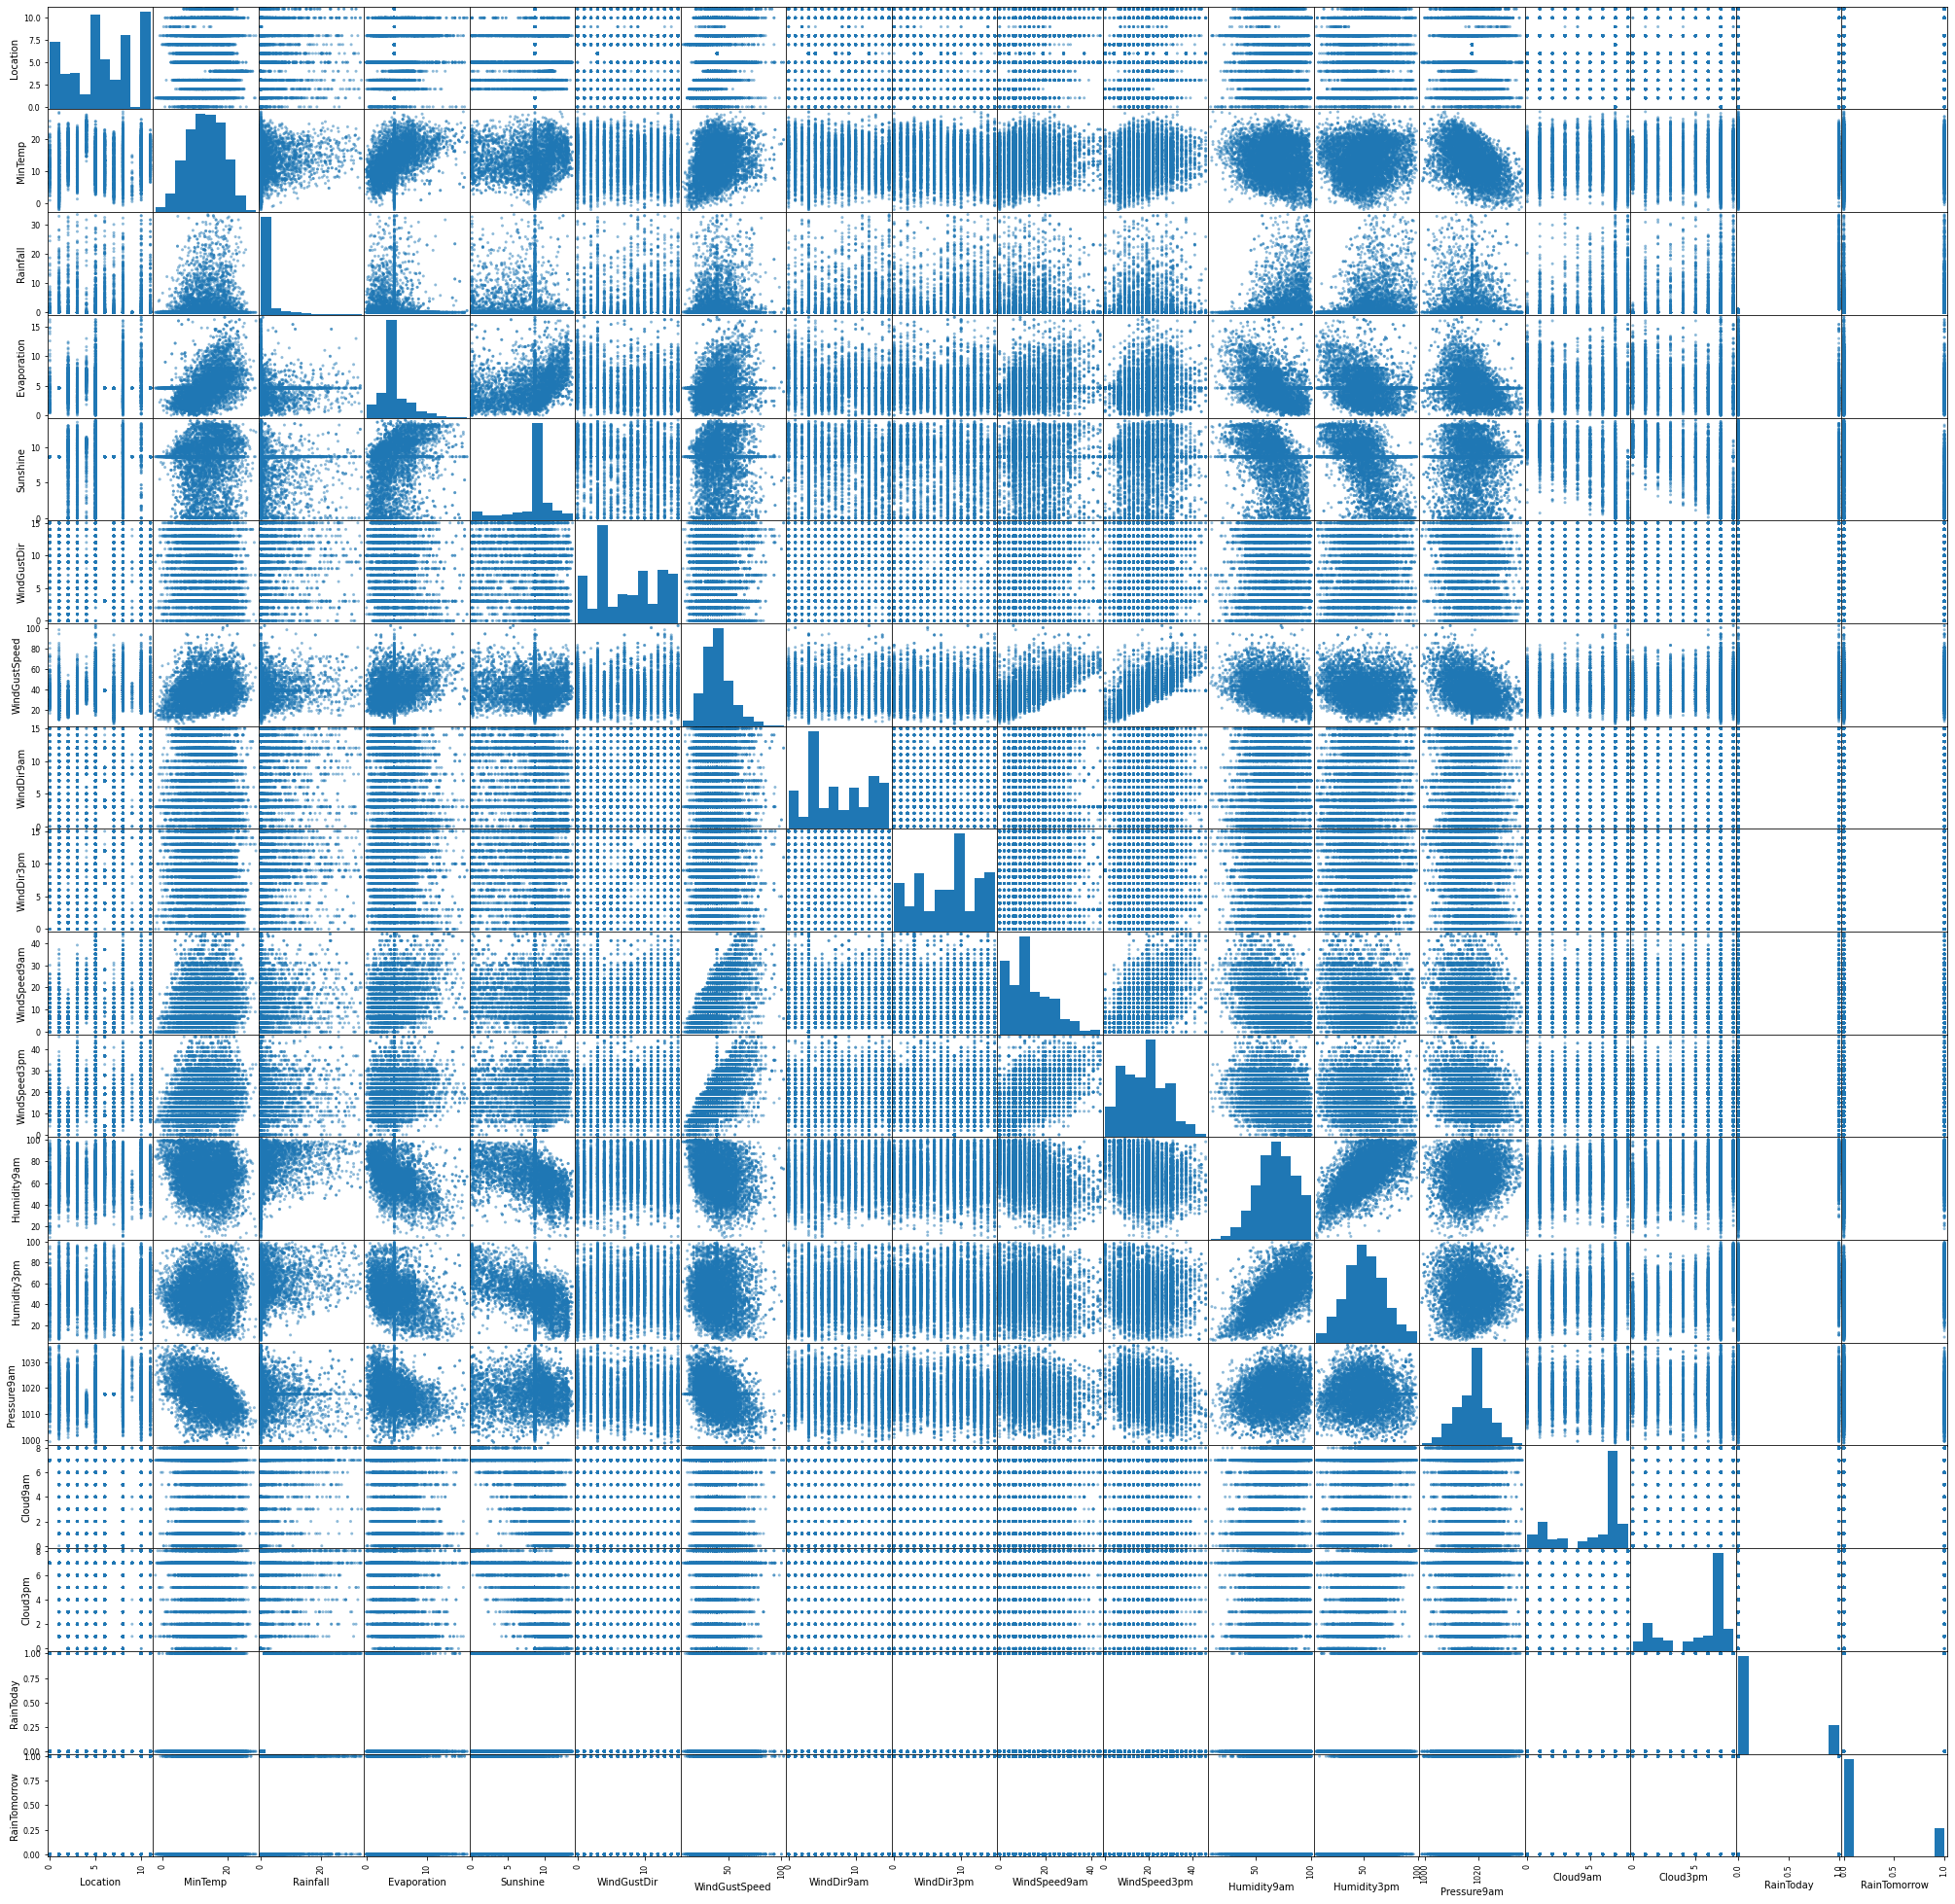

In [97]:
scatter_matrix(df1, figsize=(35,35))
plt.show()

<AxesSubplot:>

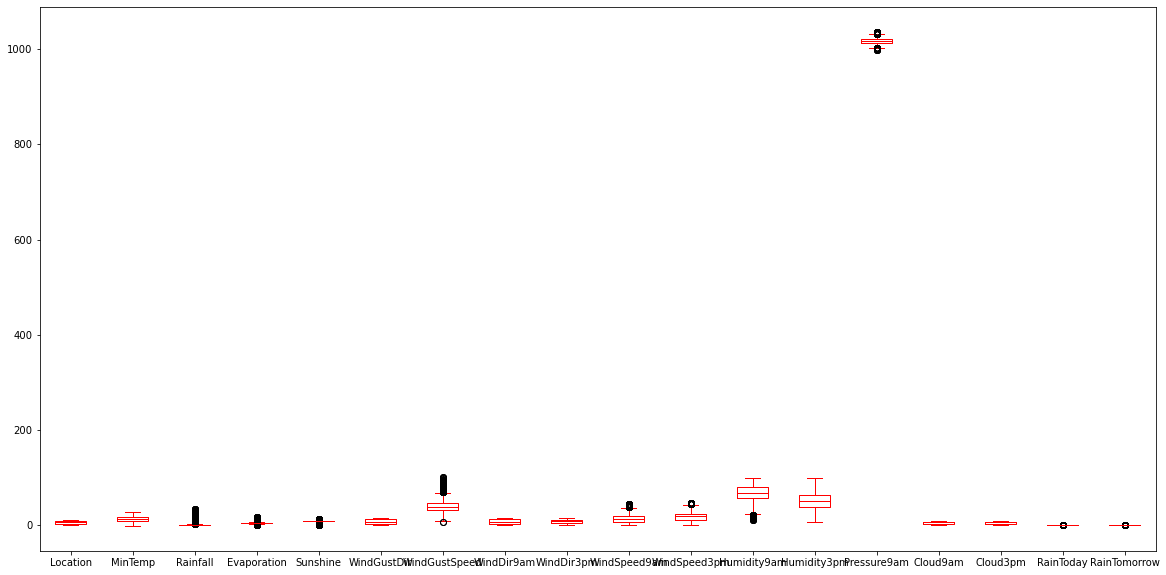

In [98]:
df1.plot(kind='box', figsize=(20,10), color='r')

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

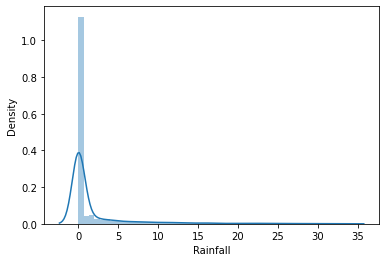

In [99]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df1["Rainfall"])

<AxesSubplot:>

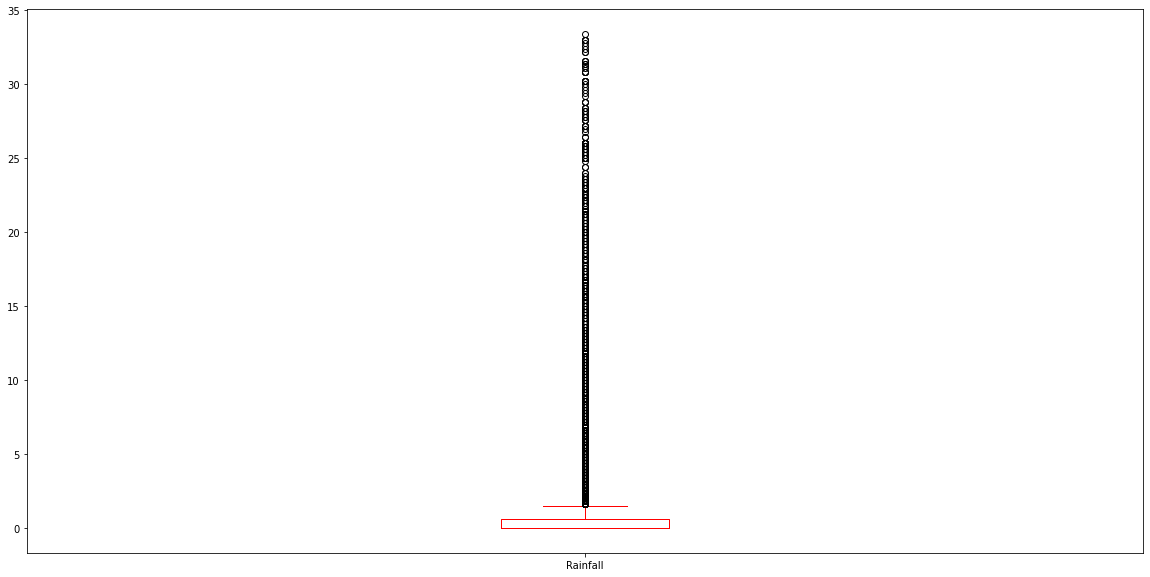

In [100]:
df1['Rainfall'].plot(kind='box', figsize=(20,10), color='r')

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

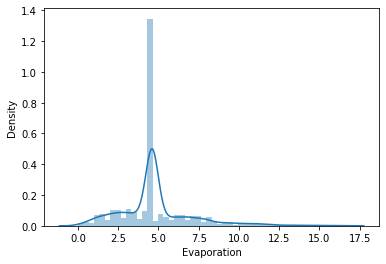

In [101]:
sns.distplot(df1["Evaporation"])

<AxesSubplot:>

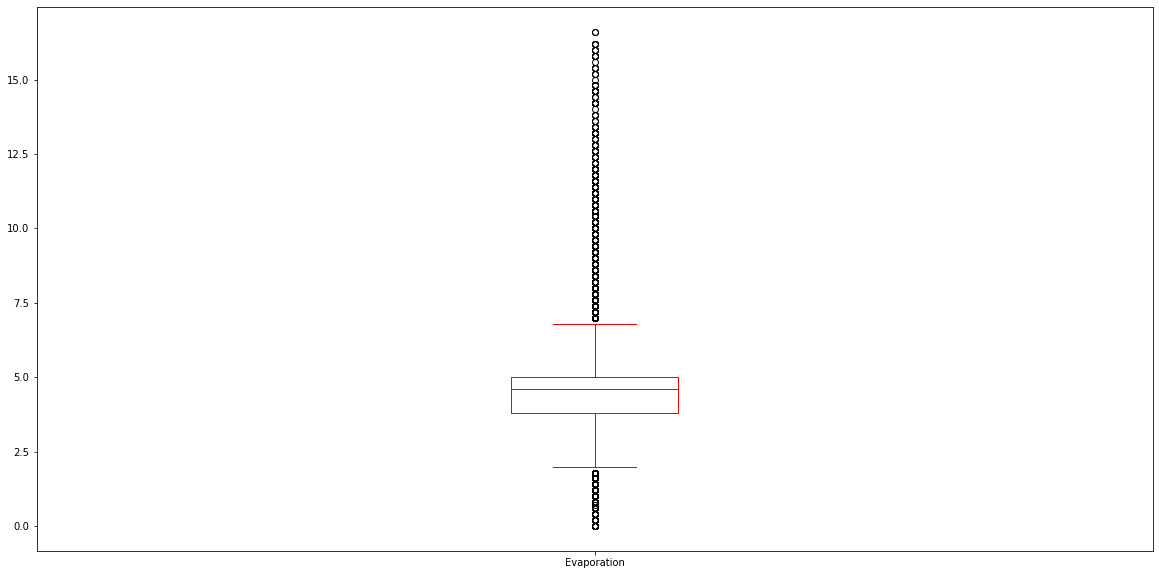

In [102]:
df1['Evaporation'].plot(kind='box', figsize=(20,10), color='r')

<AxesSubplot:xlabel='Sunshine', ylabel='Density'>

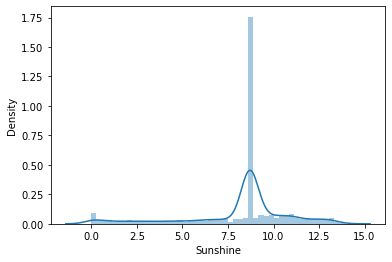

In [103]:
sns.distplot(df1["Sunshine"])

<AxesSubplot:>

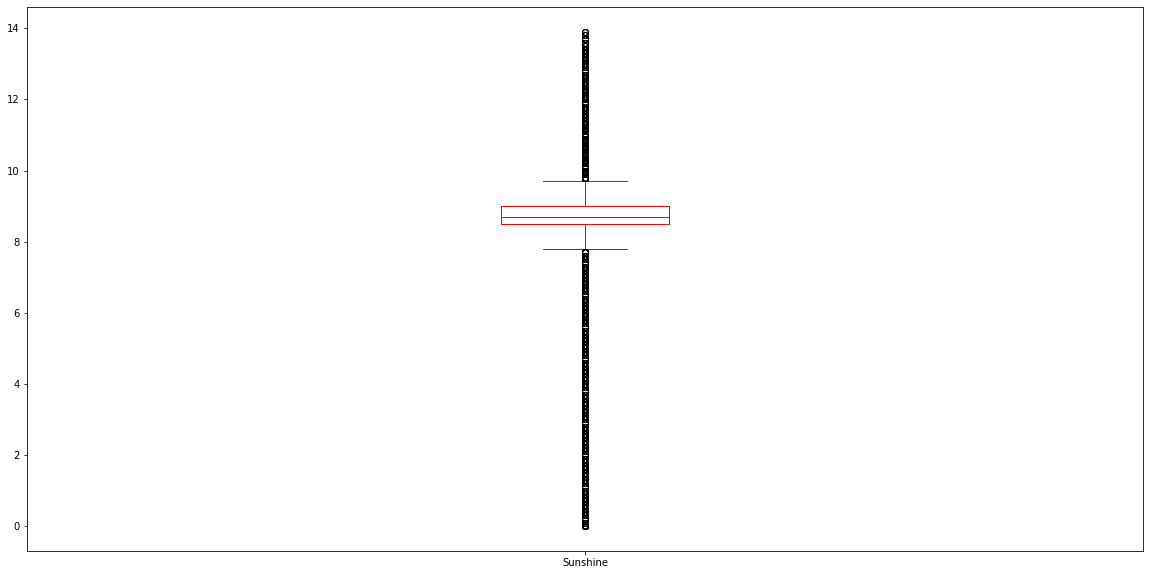

In [104]:
df1['Sunshine'].plot(kind='box', figsize=(20,10), color='r')

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

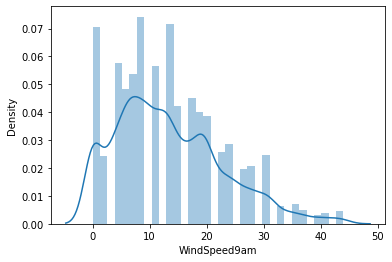

In [105]:
sns.distplot(df1["WindSpeed9am"])

<AxesSubplot:>

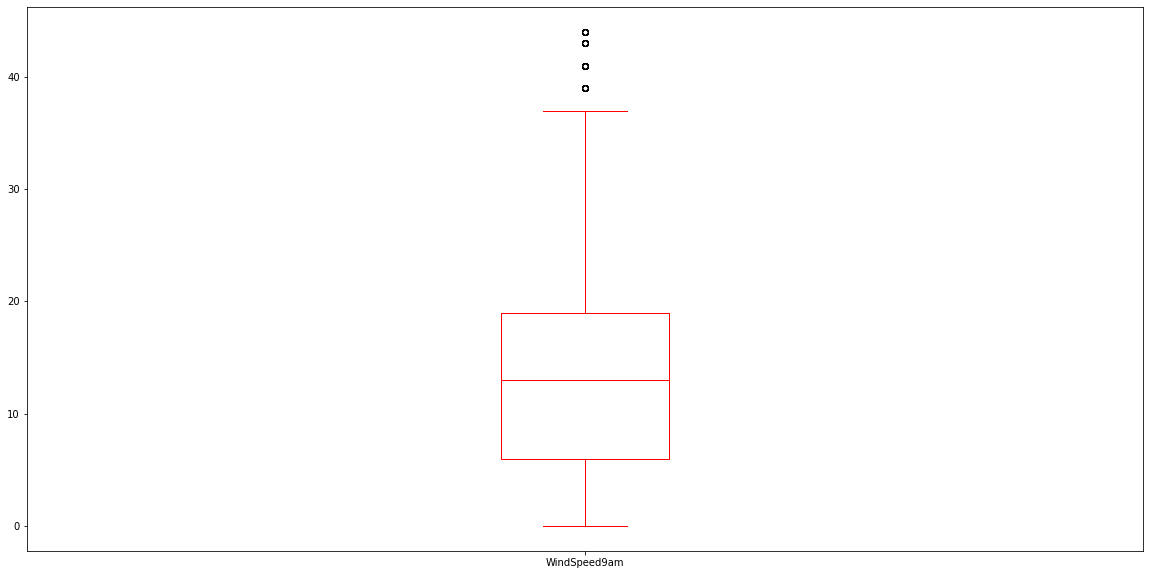

In [106]:
df1['WindSpeed9am'].plot(kind='box', figsize=(20,10), color='r')

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

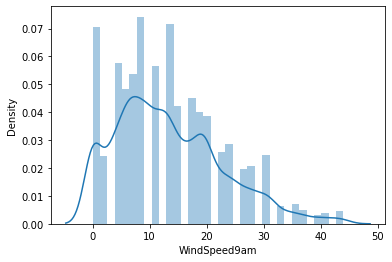

In [107]:
sns.distplot(df1["WindSpeed9am"])

<AxesSubplot:>

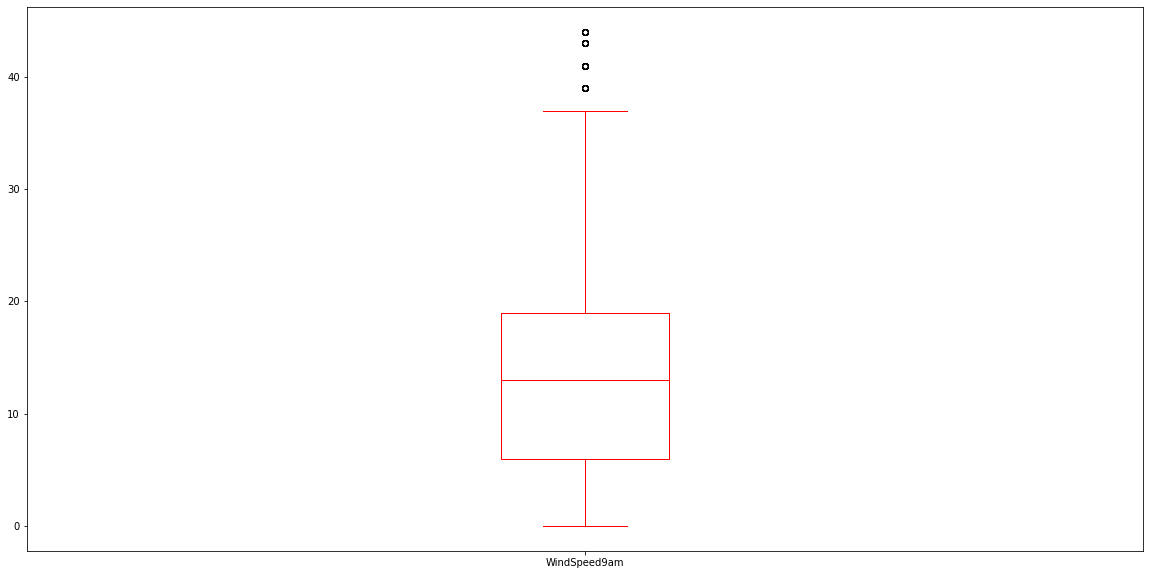

In [108]:
df1['WindSpeed9am'].plot(kind='box', figsize=(20,10), color='r')

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Density'>

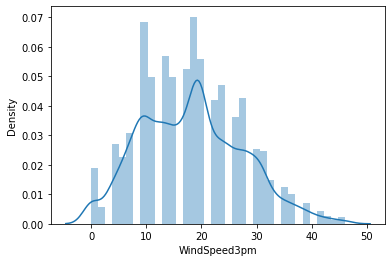

In [109]:
sns.distplot(df1["WindSpeed3pm"])

<AxesSubplot:>

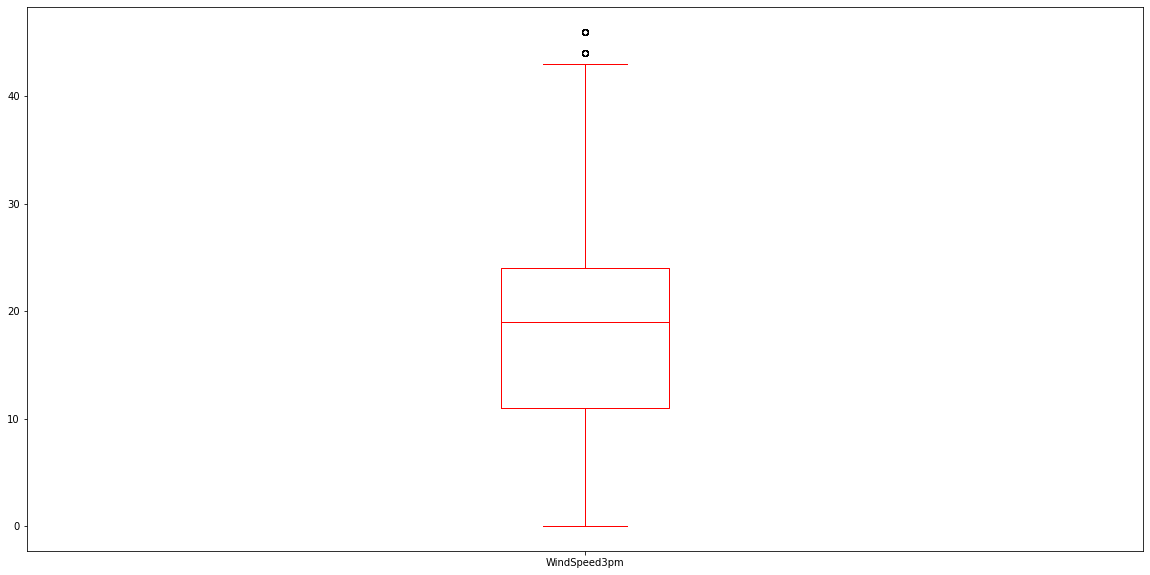

In [110]:
df1['WindSpeed3pm'].plot(kind='box', figsize=(20,10), color='r')

<AxesSubplot:xlabel='Pressure9am', ylabel='Density'>

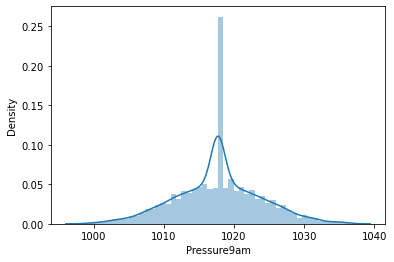

In [111]:
sns.distplot(df1["Pressure9am"])

<AxesSubplot:>

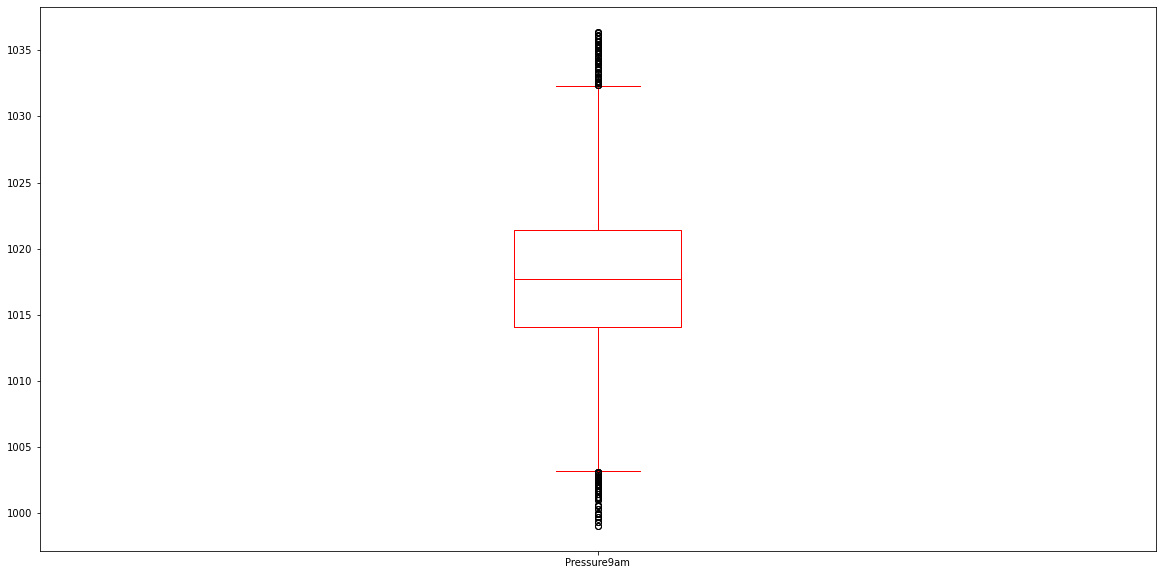

In [112]:
df1['Pressure9am'].plot(kind='box', figsize=(20,10), color='r')

In [123]:
from scipy.stats import zscore
import numpy as np

In [124]:
z_score=zscore(df1[['Rainfall','Evaporation','Sunshine','WindSpeed9am','WindSpeed3pm','Pressure9am','RainToday']])

In [125]:
abs_z_score=np.abs(z_score)

In [126]:
filtering_entry=(abs_z_score<3).all(axis=1)

In [127]:
df1=df1[filtering_entry]

In [128]:
df1.skew()

Location        -0.027757
MinTemp         -0.040274
Rainfall         2.873966
Evaporation      0.631875
Sunshine        -1.266298
WindGustDir      0.106290
WindGustSpeed    0.704107
WindDir9am       0.177014
WindDir3pm      -0.107454
WindSpeed9am     0.628304
WindSpeed3pm     0.252685
Humidity9am     -0.233043
Humidity3pm      0.119362
Pressure9am      0.024459
Cloud9am        -0.831634
Cloud3pm        -0.773344
RainToday        1.597072
RainTomorrow     1.420958
dtype: float64

# Pre-processing Pipeline

# 1) Rainfall Prediction (Classifiction problem)

In [130]:
x=df1.drop(columns='RainTomorrow')
y=df1['RainTomorrow']

In [134]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.48754084,  0.08952859, -0.14572397, ...,  1.04079208,
         0.70791006, -0.48123559],
       [-1.48754084, -1.02193326, -0.41755286, ...,  0.66803112,
         0.70791006, -0.48123559],
       [-1.48754084, -0.00309323, -0.41755286, ...,  0.66803112,
        -1.23093855, -0.48123559],
       ...,
       [ 1.03658503, -1.39242055, -0.41755286, ...,  0.66803112,
         0.70791006, -0.48123559],
       [ 1.03658503, -0.94783581, -0.41755286, ..., -0.82301273,
        -1.23093855, -0.48123559],
       [ 1.03658503,  0.36739406, -0.41755286, ...,  1.04079208,
         1.09567978, -0.48123559]])

In [136]:
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [137]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i)
           for i in range(x_scaled.shape[1])]
vif["feature"]=x.columns
vif

vif        feature
0   1.149805       Location
1   1.572630        MinTemp
2   2.978030       Rainfall
3   1.565752    Evaporation
4   1.689718       Sunshine
5   1.579971    WindGustDir
6   2.173099  WindGustSpeed
7   1.261580     WindDir9am
8   1.410664     WindDir3pm
9   1.881063   WindSpeed9am
10  1.890700   WindSpeed3pm
11  2.240778    Humidity9am
12  1.891833    Humidity3pm
13  1.499147    Pressure9am
14  1.838059       Cloud9am
15  1.787083       Cloud3pm
16  3.058703      RainToday

# Building Machine Learning Models

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

# Logistic Regression

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [140]:
y_predict_test = classifier.predict(x_test)

In [141]:
cm = confusion_matrix(y_test, y_predict_test)
cm

array([[1418,   53],
       [ 229,  152]], dtype=int64)

In [142]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1471
           1       0.74      0.40      0.52       381

    accuracy                           0.85      1852
   macro avg       0.80      0.68      0.71      1852
weighted avg       0.84      0.85      0.83      1852



In [143]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
cross_val=cross_val_score(classifier, x,y,cv=7)
cross_val.mean()

0.8265366595290499

In [144]:
param = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }
grid_search2 = GridSearchCV(classifier, param_grid=param)

In [145]:
grid_result = grid_search2.fit(x_train, y_train)
print('Best Params: ', grid_result.best_params_)

Best Params:  {'C': 0.1}


In [146]:
regress=LogisticRegression(C=0.1)
regress.fit(x_train, y_train)

LogisticRegression(C=0.1)

In [147]:
y_predict_t = regress.predict(x_test)

In [148]:
accuracy_score(y_test, y_predict_t)

0.8482721382289417

In [149]:
print(classification_report(y_test, y_predict_t))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1471
           1       0.75      0.40      0.52       381

    accuracy                           0.85      1852
   macro avg       0.80      0.68      0.71      1852
weighted avg       0.84      0.85      0.83      1852



logistic regression score=85%

# Random Forest

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [152]:
y_pr=clf.predict(x_test)

In [153]:
accuracy_score(y_test, y_pr)

0.8979481641468683

In [154]:
print(classification_report(y_test, y_pr))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1471
           1       0.84      0.62      0.72       381

    accuracy                           0.90      1852
   macro avg       0.87      0.80      0.83      1852
weighted avg       0.89      0.90      0.89      1852



In [155]:
cm_ = confusion_matrix(y_test, y_pr)
cm_

array([[1425,   46],
       [ 143,  238]], dtype=int64)

In [156]:
cross_val=cross_val_score(clf, x,y,cv=7)
cross_val.mean()

0.8415407000984578

In [157]:
param_grid_1 = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5]
}

grid_search_1 = GridSearchCV(estimator = clf, param_grid = param_grid_1)

In [158]:
grid_result_1 = grid_search_1.fit(x_train, y_train)
print('Best Params: ', grid_result_1.best_params_)

Best Params:  {'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3}


In [159]:
print('Best Score: ', grid_result_1.best_score_)

Best Score:  0.8702285516321417


In [160]:
rf=RandomForestClassifier(bootstrap= True, max_depth= 90, max_features= 3, min_samples_leaf= 3)

In [161]:
rf.fit(x_train, y_train)
y_pr1=rf.predict(x_test)

In [163]:
accuracy_score(y_test, y_pr1)

0.8790496760259179

In [164]:
print(classification_report(y_test, y_pr1))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1471
           1       0.83      0.52      0.64       381

    accuracy                           0.88      1852
   macro avg       0.86      0.74      0.78      1852
weighted avg       0.87      0.88      0.87      1852



Random forest maximum score=90%

In [166]:
a=np.array(y_test)
lr=np.array(classifier.predict(x_test))
rf=np.array(clf.predict(x_test))
df_rain=pd.DataFrame({'original':a,'Predicted_lr':lr,'pred_rf':rf})
df_rain

original  Predicted_lr  pred_rf
0            0             0        0
1            0             0        0
2            0             0        0
3            0             1        1
4            0             0        0
...        ...           ...      ...
1847         0             0        0
1848         0             0        0
1849         0             0        0
1850         1             0        0
1851         0             0        0

[1852 rows x 3 columns]

<AxesSubplot:>

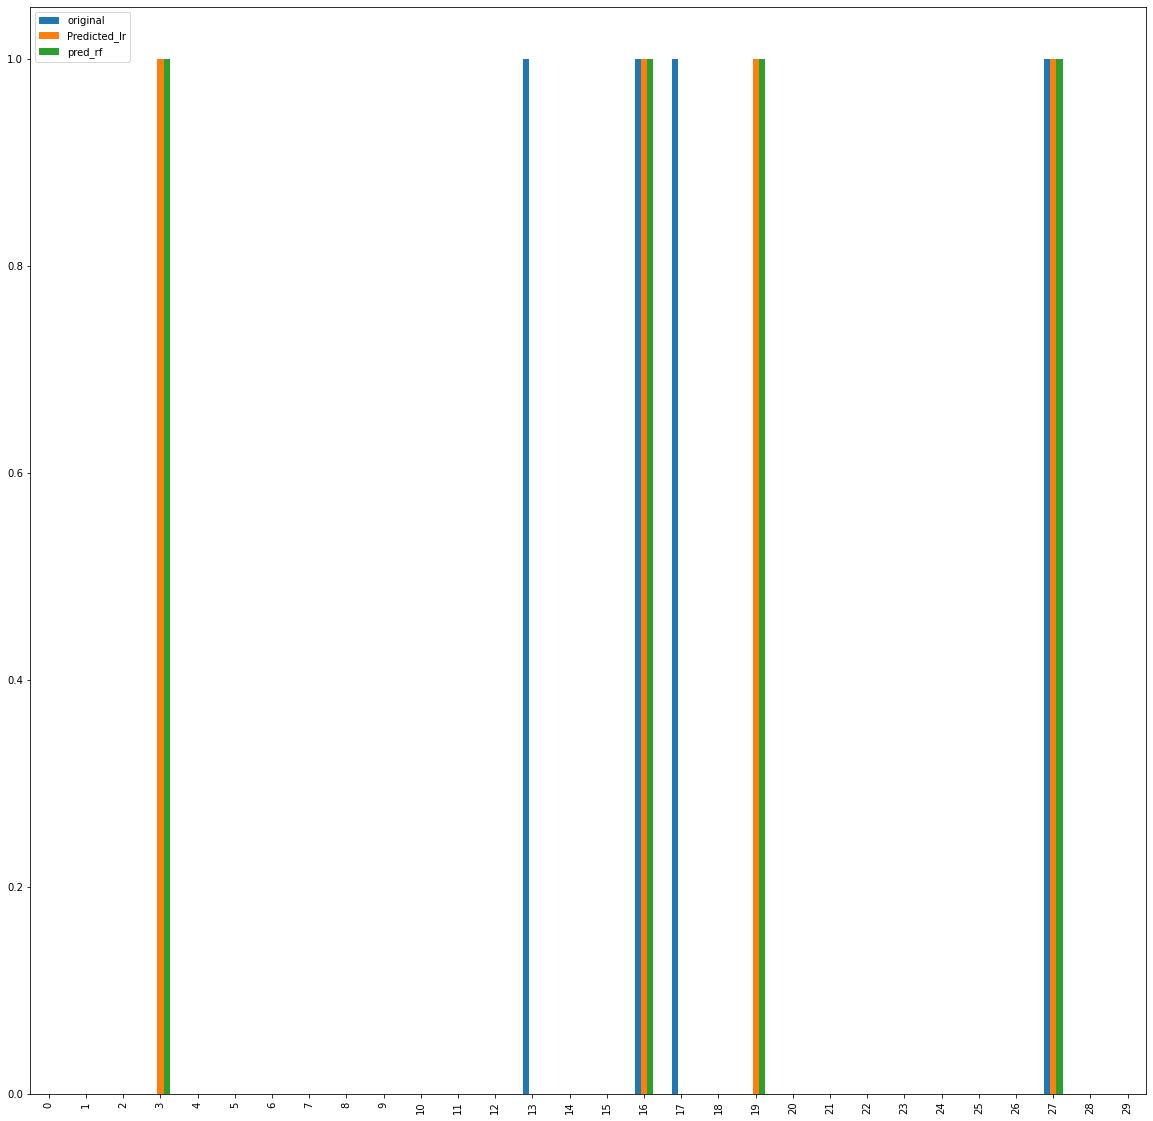

In [167]:
df_rain.head(30).plot.bar(figsize=(20,20))

# Concluding Remark
Considering Random forest as best model as it gives maximum accuracy.

# Saving Model

In [168]:
import pickle
filename='rainfall_prediction_classification.pickle'
pickle.dump(rf,open(filename,'wb'))

##  2. Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

This is continuous problem

In [169]:
df1.columns

Index(['Location', 'MinTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [171]:
x1=df1.drop(columns='Rainfall')
y1=df1['Rainfall']

In [172]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1_scaled=scaler.fit_transform(x1)
x1_scaled

array([[-1.48754084,  0.08952859, -0.02089482, ...,  0.70791006,
        -0.48123559, -0.51627637],
       [-1.48754084, -1.02193326, -0.02089482, ...,  0.70791006,
        -0.48123559, -0.51627637],
       [-1.48754084, -0.00309323, -0.02089482, ..., -1.23093855,
        -0.48123559, -0.51627637],
       ...,
       [ 1.03658503, -1.39242055, -0.02089482, ...,  0.70791006,
        -0.48123559, -0.51627637],
       [ 1.03658503, -0.94783581, -0.02089482, ..., -1.23093855,
        -0.48123559, -0.51627637],
       [ 1.03658503,  0.36739406, -0.02089482, ...,  1.09567978,
        -0.48123559, -0.51627637]])

In [173]:
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [174]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x1_scaled,i)
           for i in range(x1_scaled.shape[1])]
vif["feature"]=x1.columns
vif

vif        feature
0   1.153171       Location
1   1.571725        MinTemp
2   1.566213    Evaporation
3   1.703837       Sunshine
4   1.579922    WindGustDir
5   2.242583  WindGustSpeed
6   1.262403     WindDir9am
7   1.412493     WindDir3pm
8   1.878846   WindSpeed9am
9   1.899804   WindSpeed3pm
10  2.225325    Humidity9am
11  2.058534    Humidity3pm
12  1.506852    Pressure9am
13  1.838394       Cloud9am
14  1.797737       Cloud3pm
15  1.236786      RainToday
16  1.359845   RainTomorrow

# Building Machine Learning Models

# Linear Regression

In [200]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1_scaled,y1,test_size=0.25,random_state=355)

In [201]:
lr1=LinearRegression()
lr1.fit(x1_train,y1_train)

LinearRegression()

In [202]:
pred1=lr1.predict(x1_test)

In [203]:
lr1.score(x1_train,y1_train)

0.6680769914423172

In [204]:
lr1.score(x1_test,y1_test)

0.6550239101215334

In [205]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y1_test, pred1))
print('MSE:', metrics.mean_squared_error(y1_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, pred1)))

MAE: 0.5867416946510888
MSE: 1.5943148741004345
RMSE: 1.262661820956203


In [206]:
from sklearn.metrics import r2_score
r2_score(y1_test, pred1)

0.6550239101215334

# Decision Tree

In [207]:
from sklearn.tree import DecisionTreeRegressor
tree1=DecisionTreeRegressor()
tree1.fit(x1_train,y1_train)

DecisionTreeRegressor()

In [208]:
predict1_t=tree1.predict(x1_test)
predict1_t

array([0. , 0. , 0. , ..., 0. , 0.2, 1. ])

In [209]:
print('MAE:', metrics.mean_absolute_error(y1_test, predict1_t))
print('MSE:', metrics.mean_squared_error(y1_test, predict1_t))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, predict1_t)))

MAE: 0.49303455723542117
MSE: 2.3438498920086395
RMSE: 1.5309637134852803


In [210]:
r2_score(y1_test, predict1_t)

0.49284035158774386

# Knn regression

In [211]:
from sklearn.neighbors import KNeighborsRegressor

In [212]:
knn1= KNeighborsRegressor()
knn1.fit(x1_train, y1_train)

KNeighborsRegressor()

In [213]:
predict_k=knn1.predict(x1_test)

In [214]:
print('MAE:', metrics.mean_absolute_error(y1_test, predict_k))
print('MSE:', metrics.mean_squared_error(y1_test, predict_k))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, predict_k)))

MAE: 0.5352159827213823
MSE: 1.7882257019438443
RMSE: 1.3372455653109658


In [215]:
r2_score(y1_test, predict_k)

0.613065699569016

# Concluding Remark
Considering Linear Regression as best model as it gives lower RMSE value and R2 score is near to 1

# saving model

In [217]:
import pickle
filename='RainfallPrediction_Regression.pickle'
pickle.dump(lr1,open(filename,'wb'))